---
---

# **1 - Dataset**

**CIA Country Analysis and Clustering**


Source: All these data sets are made up of data from the US government. 
https://www.cia.gov/library/publications/the-world-factbook/docs/faqs.html

## Goal: 

### Gain insights into similarity between countries and regions of the world by experimenting with different cluster amounts. What do these clusters represent? *Note: There is no 100% right answer, make sure to watch the video for thoughts.*

----


**Run the following cells to import libraries and read in data.**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

**Explore the rows and columns of the data as well as the data types of the columns.**

In [2]:
df = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Clustering/Country_and_Region_Similarities/CIA_Country_Facts.csv')

In [3]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,NaN,NaN,NaN
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,NaN,NaN,NaN


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 227 entries, 0 to 226
Data columns (total 20 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             227 non-null    object 
 1   Region                              227 non-null    object 
 2   Population                          227 non-null    int64  
 3   Area (sq. mi.)                      227 non-null    int64  
 4   Pop. Density (per sq. mi.)          227 non-null    float64
 5   Coastline (coast/area ratio)        227 non-null    float64
 6   Net migration                       224 non-null    float64
 7   Infant mortality (per 1000 births)  224 non-null    float64
 8   GDP ($ per capita)                  226 non-null    float64
 9   Literacy (%)                        209 non-null    float64
 10  Phones (per 1000)                   223 non-null    float64
 11  Arable (%)                          225 non-n

In [5]:
miss_val = pd.DataFrame(df.isnull().sum(), columns=['Missing Value'])
miss_val[miss_val['Missing Value']>0]

,Missing Value
Net migration,3
Infant mortality (per 1000 births),3
GDP ($ per capita),1
Literacy (%),18
Phones (per 1000),4
Arable (%),2
Crops (%),2
Other (%),2
Climate,22
Birthrate,3


In [6]:
df.describe()

,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
count,2.270000e+02,2.270000e+02,227.000000,227.000000,224.000000,224.000000,226.000000,209.000000,223.000000,225.000000,225.000000,225.000000,205.000000,224.000000,223.000000,212.000000,211.000000,212.000000
mean,2.874028e+07,5.982270e+05,379.047137,21.165330,0.038125,35.506964,9689.823009,82.838278,236.061435,13.797111,4.564222,81.638311,2.139024,22.114732,9.241345,0.150844,0.282711,0.565283
std,1.178913e+08,1.790282e+06,1660.185825,72.286863,4.889269,35.389899,10049.138513,19.722173,227.991829,13.040402,8.361470,16.140835,0.699397,11.176716,4.990026,0.146798,0.138272,0.165841
min,7.026000e+03,2.000000e+00,0.000000,0.000000,-20.990000,2.290000,500.000000,17.600000,0.200000,0.000000,0.000000,33.330000,1.000000,7.290000,2.290000,0.000000,0.020000,0.062000
25%,4.376240e+05,4.647500e+03,29.150000,0.100000,-0.927500,8.150000,1900.000000,70.600000,37.800000,3.220000,0.190000,71.650000,2.000000,12.672500,5.910000,0.037750,0.193000,0.429250
50%,4.786994e+06,8.660000e+04,78.800000,0.730000,0.000000,21.000000,5550.000000,92.500000,176.200000,10.420000,1.030000,85.700000,2.000000,18.790000,7.840000,0.099000,0.272000,0.571000
75%,1.749777e+07,4.418110e+05,190.150000,10.345000,0.997500,55.705000,15700.000000,98.000000,389.650000,20.000000,4.440000,95.440000,3.000000,29.820000,10.605000,0.221000,0.341000,0.678500
max,1.313974e+09,1.707520e+07,16271.500000,870.660000,23.060000,191.190000,55100.000000,100.000000,1035.600000,62.110000,50.680000,100.000000,4.000000,50.730000,29.740000,0.769000,0.906000,0.954000


---
---

# **2 - Exploratory Data Analysis and Data Preparation**


## **A. Population Distribution**

**Create a histogram of the Population column.**

**You should notice the histogram is skewed due to a few large countries, reset the X axis to only show countries with less than 0.5 billion people**

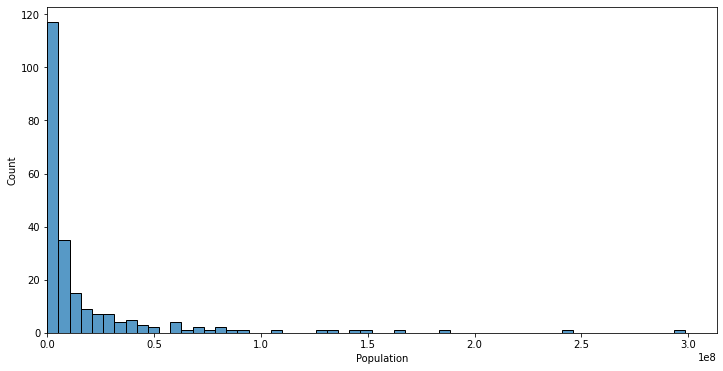

In [7]:
plt.figure(figsize=(12,6))
sns.histplot(data=df[df['Population'] < 0.5E9], x='Population')
plt.xlim(0);

---

## **B. GDP per Region**

**Now let's explore GDP and Regions. Create a bar chart showing the mean GDP per Capita per region (recall the black bar represents std).**

In [8]:
# Strip whitespace in Region column
df['Region'] = df['Region'].apply(lambda x:x.strip())

In [9]:
gdp_per_region = df.groupby('Region')[['GDP ($ per capita)']].mean()
gdp_per_region

,GDP ($ per capita)
Region,
ASIA (EX. NEAR EAST),8053.571429
BALTICS,11300.000000
C.W. OF IND. STATES,4000.000000
EASTERN EUROPE,9808.333333
LATIN AMER. & CARIB,8682.222222
NEAR EAST,10456.250000
NORTHERN AFRICA,5460.000000
NORTHERN AMERICA,26100.000000
OCEANIA,8247.619048


In [10]:
#plt.figure(figsize=(12,6), dpi=80)

# ci='sd' -> confidence intervals is standard deviation
#sns.barplot(data=gdp_per_region, x='Region', y='GDP ($ per capita)', estimator=np.mean, ci='sd')
#plt.xticks(rotation=90);

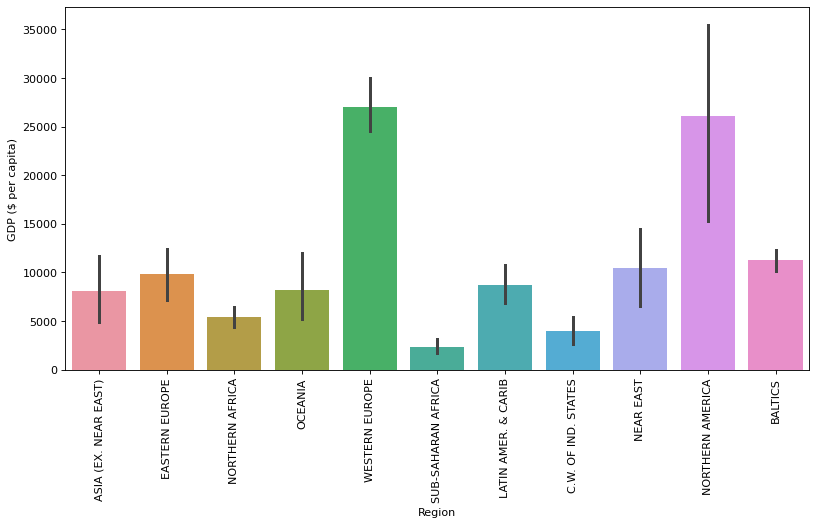

In [11]:
plt.figure(figsize=(12,6), dpi=80)

# ci='sd' -> confidence intervals is standard deviation
sns.barplot(data=df, x='Region', y='GDP ($ per capita)', estimator=np.mean)
plt.xticks(rotation=90);

* Western Europe and Northern America are the top 2 of highest GDP. It has around 2.5 times of average GDP of most Region.
* Even Northern America is 2nd highest GDP, but also have high standard deviation among countries within Northern America.  

---

## **C. Feature Relationship**

**Create a scatterplot showing the relationship between Phones per 1000 people and the GDP per Capita. Color these points by Region.**

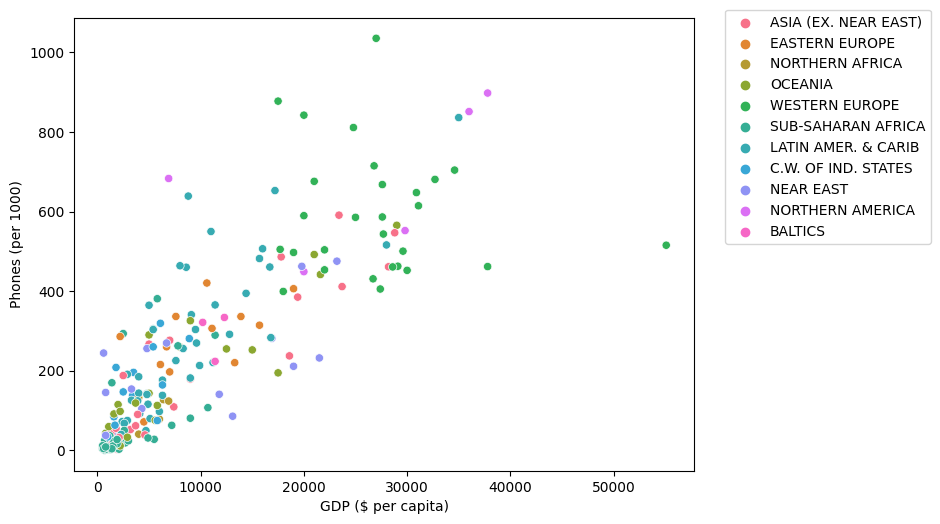

In [12]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Phones (per 1000)', hue='Region')
plt.legend(loc=(1.05,0.5));

In [13]:
df[df['GDP ($ per capita)'] > 50000]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
121,Luxembourg,WESTERN EUROPE,474413,2586,183.5,0.0,8.97,4.81,55100.0,100.0,515.4,23.28,0.4,76.32,NaN,11.94,8.41,0.01,0.13,0.86


In [14]:
df[df['Phones (per 1000)'] > 900]

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service
138,Monaco,WESTERN EUROPE,32543,2,16271.5,205.0,7.75,5.43,27000.0,99.0,1035.6,0.0,0.0,100.0,NaN,9.19,12.91,0.17,NaN,NaN


* **The higher the GDP, more higher the Phones occupation.**
* **Some Region in lower GDP also has high Phones, it assumes not all people in that region are poor.**
* **There is a Country that have high GDP but low Phones (per 1000), it is because the Country has low population**

**Create a scatterplot showing the relationship between GDP per Capita and Literacy (color the points by Region). What conclusions do you draw from this plot?**

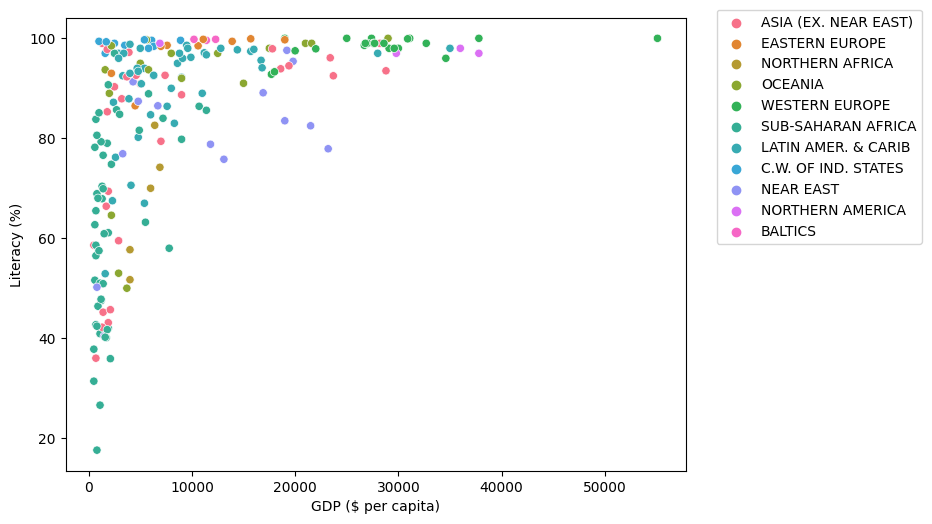

In [15]:
plt.figure(figsize=(8,6), dpi=100)
sns.scatterplot(data=df, x='GDP ($ per capita)', y='Literacy (%)', hue='Region')
plt.legend(loc=(1.05,0.5));

* **The higher the GDP of a Region, the higher likelihood of literacy percentage**
* **Its can be seen that population in Western Europe and Northern America have near 100% literacy.**
* **This is shows us that there is a borderline, if a Country pass a certain GDP, the literacy will increase and not scatter over the place**

---

## **D. Feature Correlation**

**Create a Heatmap of the Correlation between columns in the DataFrame.**

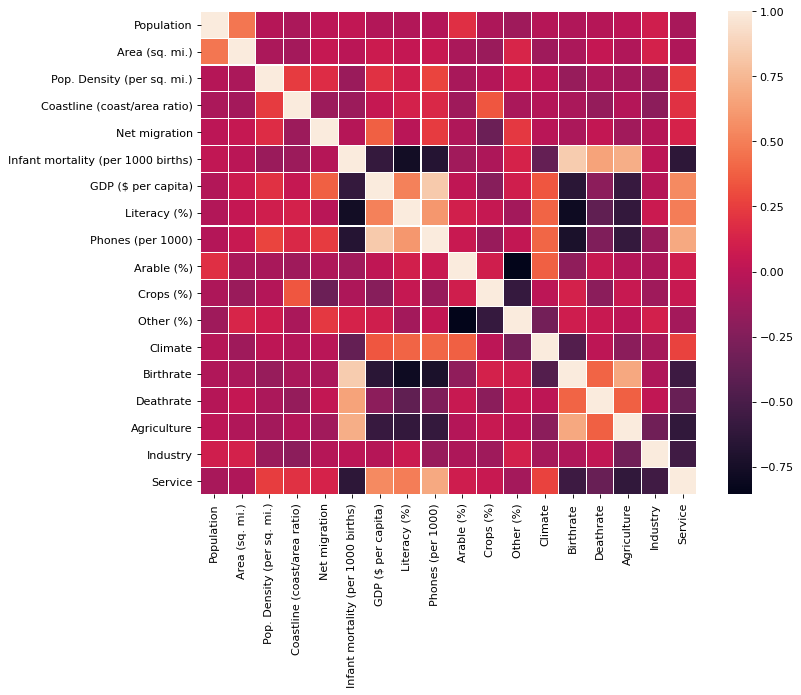

In [16]:
fig, ax = plt.subplots(figsize=(10,8), dpi=80)
sns.heatmap(df.corr(), ax=ax, lw=0.1);

* **It can be seen that birthrate and infant mortality is correlated each other. You can drop either one to try improve the model performance for supervised learning.**

**Create a clustermap of the correlations between each column with this function.**

<Figure size 900x600 with 0 Axes>

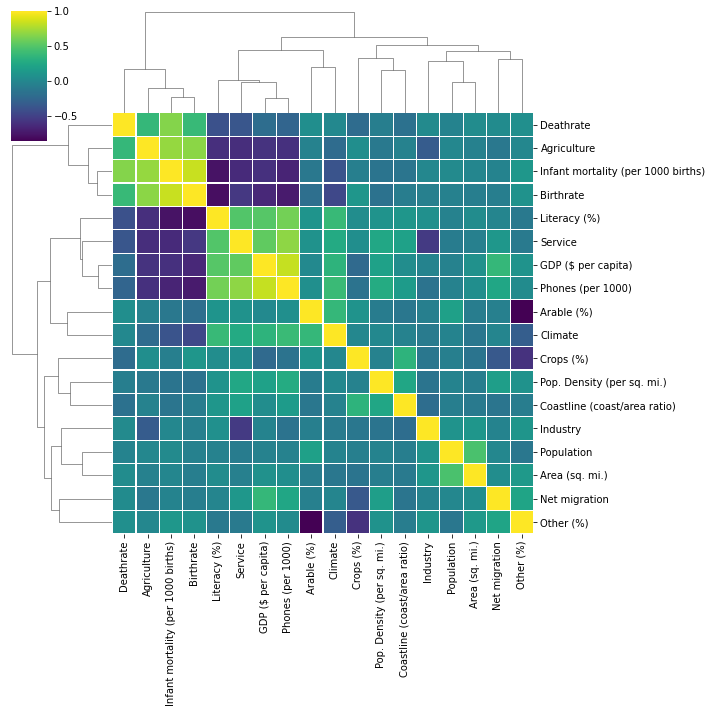

In [17]:
plt.figure(figsize=(9,6), dpi=100)
sns.clustermap(df.corr(), cmap='viridis', lw=0.1);

-----

## **E. Dealing with Missing Data**

Let's now prepare our data for Kmeans Clustering!



### **a. Fill with 0**

**Report the number of missing elements per column.**

In [18]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          3
Infant mortality (per 1000 births)     3
GDP ($ per capita)                     1
Literacy (%)                          18
Phones (per 1000)                      4
Arable (%)                             2
Crops (%)                              2
Other (%)                              2
Climate                               22
Birthrate                              3
Deathrate                              4
Agriculture                           15
Industry                              16
Service                               15
dtype: int64

**What countries have NaN for Agriculture? What is the main aspect of these countries?**

In [19]:
df[df['Agriculture'].isnull()]['Country']

3            American Samoa
4                   Andorra
78                Gibraltar
80                Greenland
83                     Guam
134                 Mayotte
140              Montserrat
144                   Nauru
153      N. Mariana Islands
171            Saint Helena
174    St Pierre & Miquelon
177              San Marino
208       Turks & Caicos Is
221       Wallis and Futuna
223          Western Sahara
Name: Country, dtype: object

**You should have noticed most of these countries are tiny islands, with the exception of Greenland and Western Sahara. Go ahead and fill any of these countries missing NaN values with 0, since they are so small or essentially non-existant.**

    

In [20]:
# REMOVAL OF TINY ISLANDS
df[df['Agriculture'].isnull()] = df[df['Agriculture'].isnull()].fillna(0)

---

### **b. Fill by Mean Value in Each Group**

**Now check to see what is still missing by counting number of missing elements again per feature:**

In [21]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                               18
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**Notice climate is missing for a few countries, but not the Region! Let's use this to our advantage. Fill in the missing Climate values based on the mean climate value for its region.**

Hints on how to do this: https://stackoverflow.com/questions/19966018/pandas-filling-missing-values-by-mean-in-each-group


In [22]:
df.groupby('Region')['Climate'].mean().round(1)

Region
ASIA (EX. NEAR EAST)    2.0
BALTICS                 3.0
C.W. OF IND. STATES     2.6
EASTERN EUROPE          3.1
LATIN AMER. & CARIB     2.0
NEAR EAST               1.7
NORTHERN AFRICA         1.5
NORTHERN AMERICA        1.5
OCEANIA                 2.0
SUB-SAHARAN AFRICA      1.8
WESTERN EUROPE          2.8
Name: Climate, dtype: float64

In [23]:
# Fill Missing Value by mean value in each group
df['Climate'] = df['Climate'].fillna(df.groupby('Region')['Climate'].transform('mean').round(1))

OR

In [24]:
# Fill Missing Value by mean value in each group
#df['Climate'] = df.groupby('Region')['Climate'].transform(lambda x:x.fillna(x.mean())).round(1)

**Check again on many elements are missing:**

In [25]:
df.isnull().sum()

Country                                0
Region                                 0
Population                             0
Area (sq. mi.)                         0
Pop. Density (per sq. mi.)             0
Coastline (coast/area ratio)           0
Net migration                          1
Infant mortality (per 1000 births)     1
GDP ($ per capita)                     0
Literacy (%)                          13
Phones (per 1000)                      2
Arable (%)                             1
Crops (%)                              1
Other (%)                              1
Climate                                0
Birthrate                              1
Deathrate                              2
Agriculture                            0
Industry                               1
Service                                1
dtype: int64

**It looks like Literacy percentage is missing. Use the same tactic as we did with Climate missing values and fill in any missing Literacy % values with the mean Literacy % of the Region.**

In [26]:
df.groupby('Region')['Literacy (%)'].mean().round(1)

Region
ASIA (EX. NEAR EAST)    79.6
BALTICS                 99.7
C.W. OF IND. STATES     98.7
EASTERN EUROPE          97.1
LATIN AMER. & CARIB     90.7
NEAR EAST               79.5
NORTHERN AFRICA         56.0
NORTHERN AMERICA        78.2
OCEANIA                 83.9
SUB-SAHARAN AFRICA      61.3
WESTERN EUROPE          94.3
Name: Literacy (%), dtype: float64

In [27]:
# Fill Missing Value by mean value in each group
df['Literacy (%)'] = df['Literacy (%)'].fillna(df.groupby('Region')['Literacy (%)'].transform('mean').round(1))

OR

In [28]:
# Fill Missing Value by mean value in each group
#df['Literacy (%)'] = df.groupby('Region')['Literacy (%)'].transform(lambda x:x.fillna(x.mean())).round(1)

---

### **c. Drop Rows That Has Missing Value**

**Check again on the remaining missing values:**

In [29]:
df.isnull().sum()

Country                               0
Region                                0
Population                            0
Area (sq. mi.)                        0
Pop. Density (per sq. mi.)            0
Coastline (coast/area ratio)          0
Net migration                         1
Infant mortality (per 1000 births)    1
GDP ($ per capita)                    0
Literacy (%)                          0
Phones (per 1000)                     2
Arable (%)                            1
Crops (%)                             1
Other (%)                             1
Climate                               0
Birthrate                             1
Deathrate                             2
Agriculture                           0
Industry                              1
Service                               1
dtype: int64

**We are now missing values for only a few countries. Go ahead and drop these countries OR feel free to fill in these last few remaining values with any preferred methodology. For simplicity, we will drop these.**

In [30]:
df = df.dropna(axis=0)

---

## **F. One-Hot Encoding**

**It is now time to prepare the data for clustering. The Country column is still a unique identifier string, so it won't be useful for clustering, since its unique for each point. Go ahead and drop this Country column.**

In [31]:
X = df.drop('Country', axis=1)

**Now let's create the X array of features, the Region column is still categorical strings, use Pandas to create dummy variables from this column to create a finalzed X matrix of continuous features along with the dummy variables for the Regions.**

In [32]:
X = pd.get_dummies(X)

---
---

# **3 - Machine Learning Model**

## **A. Setup**

### **Scaling the Data**

**Due to some measurements being in terms of percentages and other metrics being total counts (population), we should scale this data first. Use Sklearn to scale the X feature matrics.**

In [33]:
from sklearn.preprocessing import StandardScaler

In [34]:
scaler = StandardScaler()

In [35]:
scaled_X = scaler.fit_transform(X)

In [36]:
scaled_X

array([[ 0.0133285 ,  0.01855412, -0.20308668, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.21730118, -0.32370888, -0.14378531, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [ 0.02905136,  0.97784988, -0.22956327, ..., -0.31544015,
        -0.54772256, -0.36514837],
       ...,
       [-0.06726127, -0.04756396, -0.20881553, ..., -0.31544015,
        -0.54772256, -0.36514837],
       [-0.15081724,  0.07669798, -0.22840201, ..., -0.31544015,
         1.82574186, -0.36514837],
       [-0.14464933, -0.12356132, -0.2160153 , ..., -0.31544015,
         1.82574186, -0.36514837]])

---

## **B. Choosing Best K Value**

**TASK: Use a for loop to create and fit multiple KMeans models, testing from K=2-30 clusters. Keep track of the Sum of Squared Distances for each K value, then plot this out to create an "elbow" plot of K versus SSD. Optional: You may also want to create a bar plot showing the SSD difference from the previous cluster.**

In [37]:
from sklearn.cluster import KMeans

In [38]:
ssd = []

for i in range(2,31):
  kmeans = KMeans(n_clusters=i)
  kmeans.fit(scaled_X)

  #Sum of squared distances of samples to their closest cluster center.
  ssd.append(kmeans.inertia_)

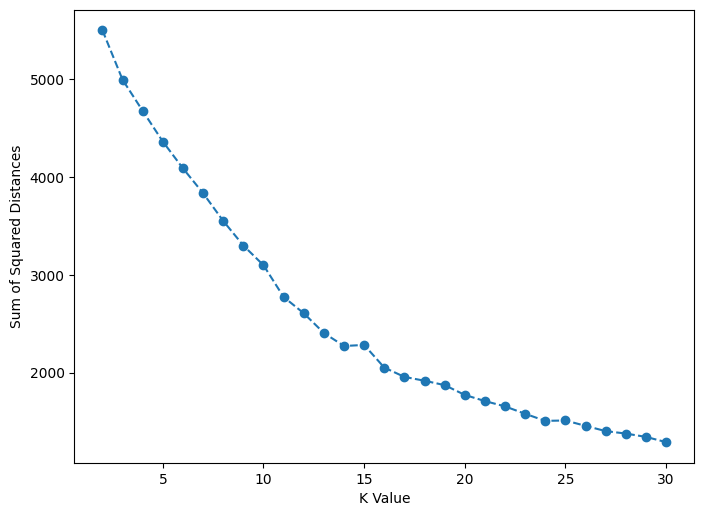

In [39]:
plt.figure(figsize=(8,6), dpi=100)
plt.plot(range(2,31), ssd,'o--')
plt.xlabel("K Value")
plt.ylabel("Sum of Squared Distances");

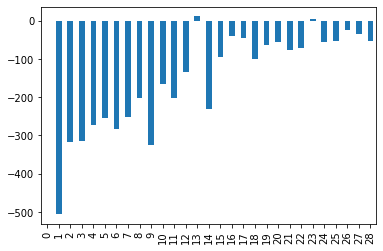

In [40]:
pd.Series(ssd).diff().plot(kind='bar');

-----

## **C. K-Means Clustering**


**What K value do you think is a good choice? Are there multiple reasonable choices? What features are helping define these cluster choices. As this is unsupervised learning, there is no 100% correct answer here.**

In [41]:
kmeans = KMeans(n_clusters=10)

In [42]:
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [43]:
kmeans.labels_

array([5, 6, 9, 4, 1, 5, 2, 2, 2, 0, 2, 4, 1, 0, 2, 7, 3, 2, 0, 1, 2, 5,
       1, 3, 2, 6, 5, 2, 2, 3, 6, 5, 3, 5, 3, 5, 1, 2, 1, 5, 5, 2, 3, 2,
       5, 5, 5, 2, 5, 6, 2, 6, 1, 5, 2, 2, 2, 9, 2, 5, 5, 8, 5, 1, 4, 1,
       1, 2, 4, 5, 5, 7, 0, 1, 5, 1, 1, 0, 2, 2, 4, 2, 5, 5, 2, 2, 2, 3,
       6, 1, 3, 3, 3, 7, 1, 1, 7, 1, 2, 3, 1, 7, 0, 5, 4, 3, 3, 7, 0, 3,
       8, 7, 5, 5, 9, 1, 8, 1, 3, 6, 5, 5, 3, 3, 5, 1, 4, 2, 5, 2, 5, 2,
       4, 0, 3, 2, 9, 5, 5, 4, 3, 1, 2, 4, 4, 2, 5, 5, 4, 1, 7, 3, 4, 2,
       4, 2, 2, 3, 6, 1, 2, 7, 2, 6, 0, 5, 2, 2, 2, 0, 2, 4, 1, 4, 7, 5,
       2, 5, 3, 6, 6, 4, 5, 5, 1, 3, 5, 2, 5, 1, 1, 7, 3, 0, 5, 3, 5, 4,
       2, 9, 7, 0, 2, 4, 5, 0, 7, 1, 1, 2, 0, 4, 2, 3, 2, 4, 7, 9, 7, 5,
       5], dtype=int32)

In [44]:
X['Clusters'] = kmeans.labels_

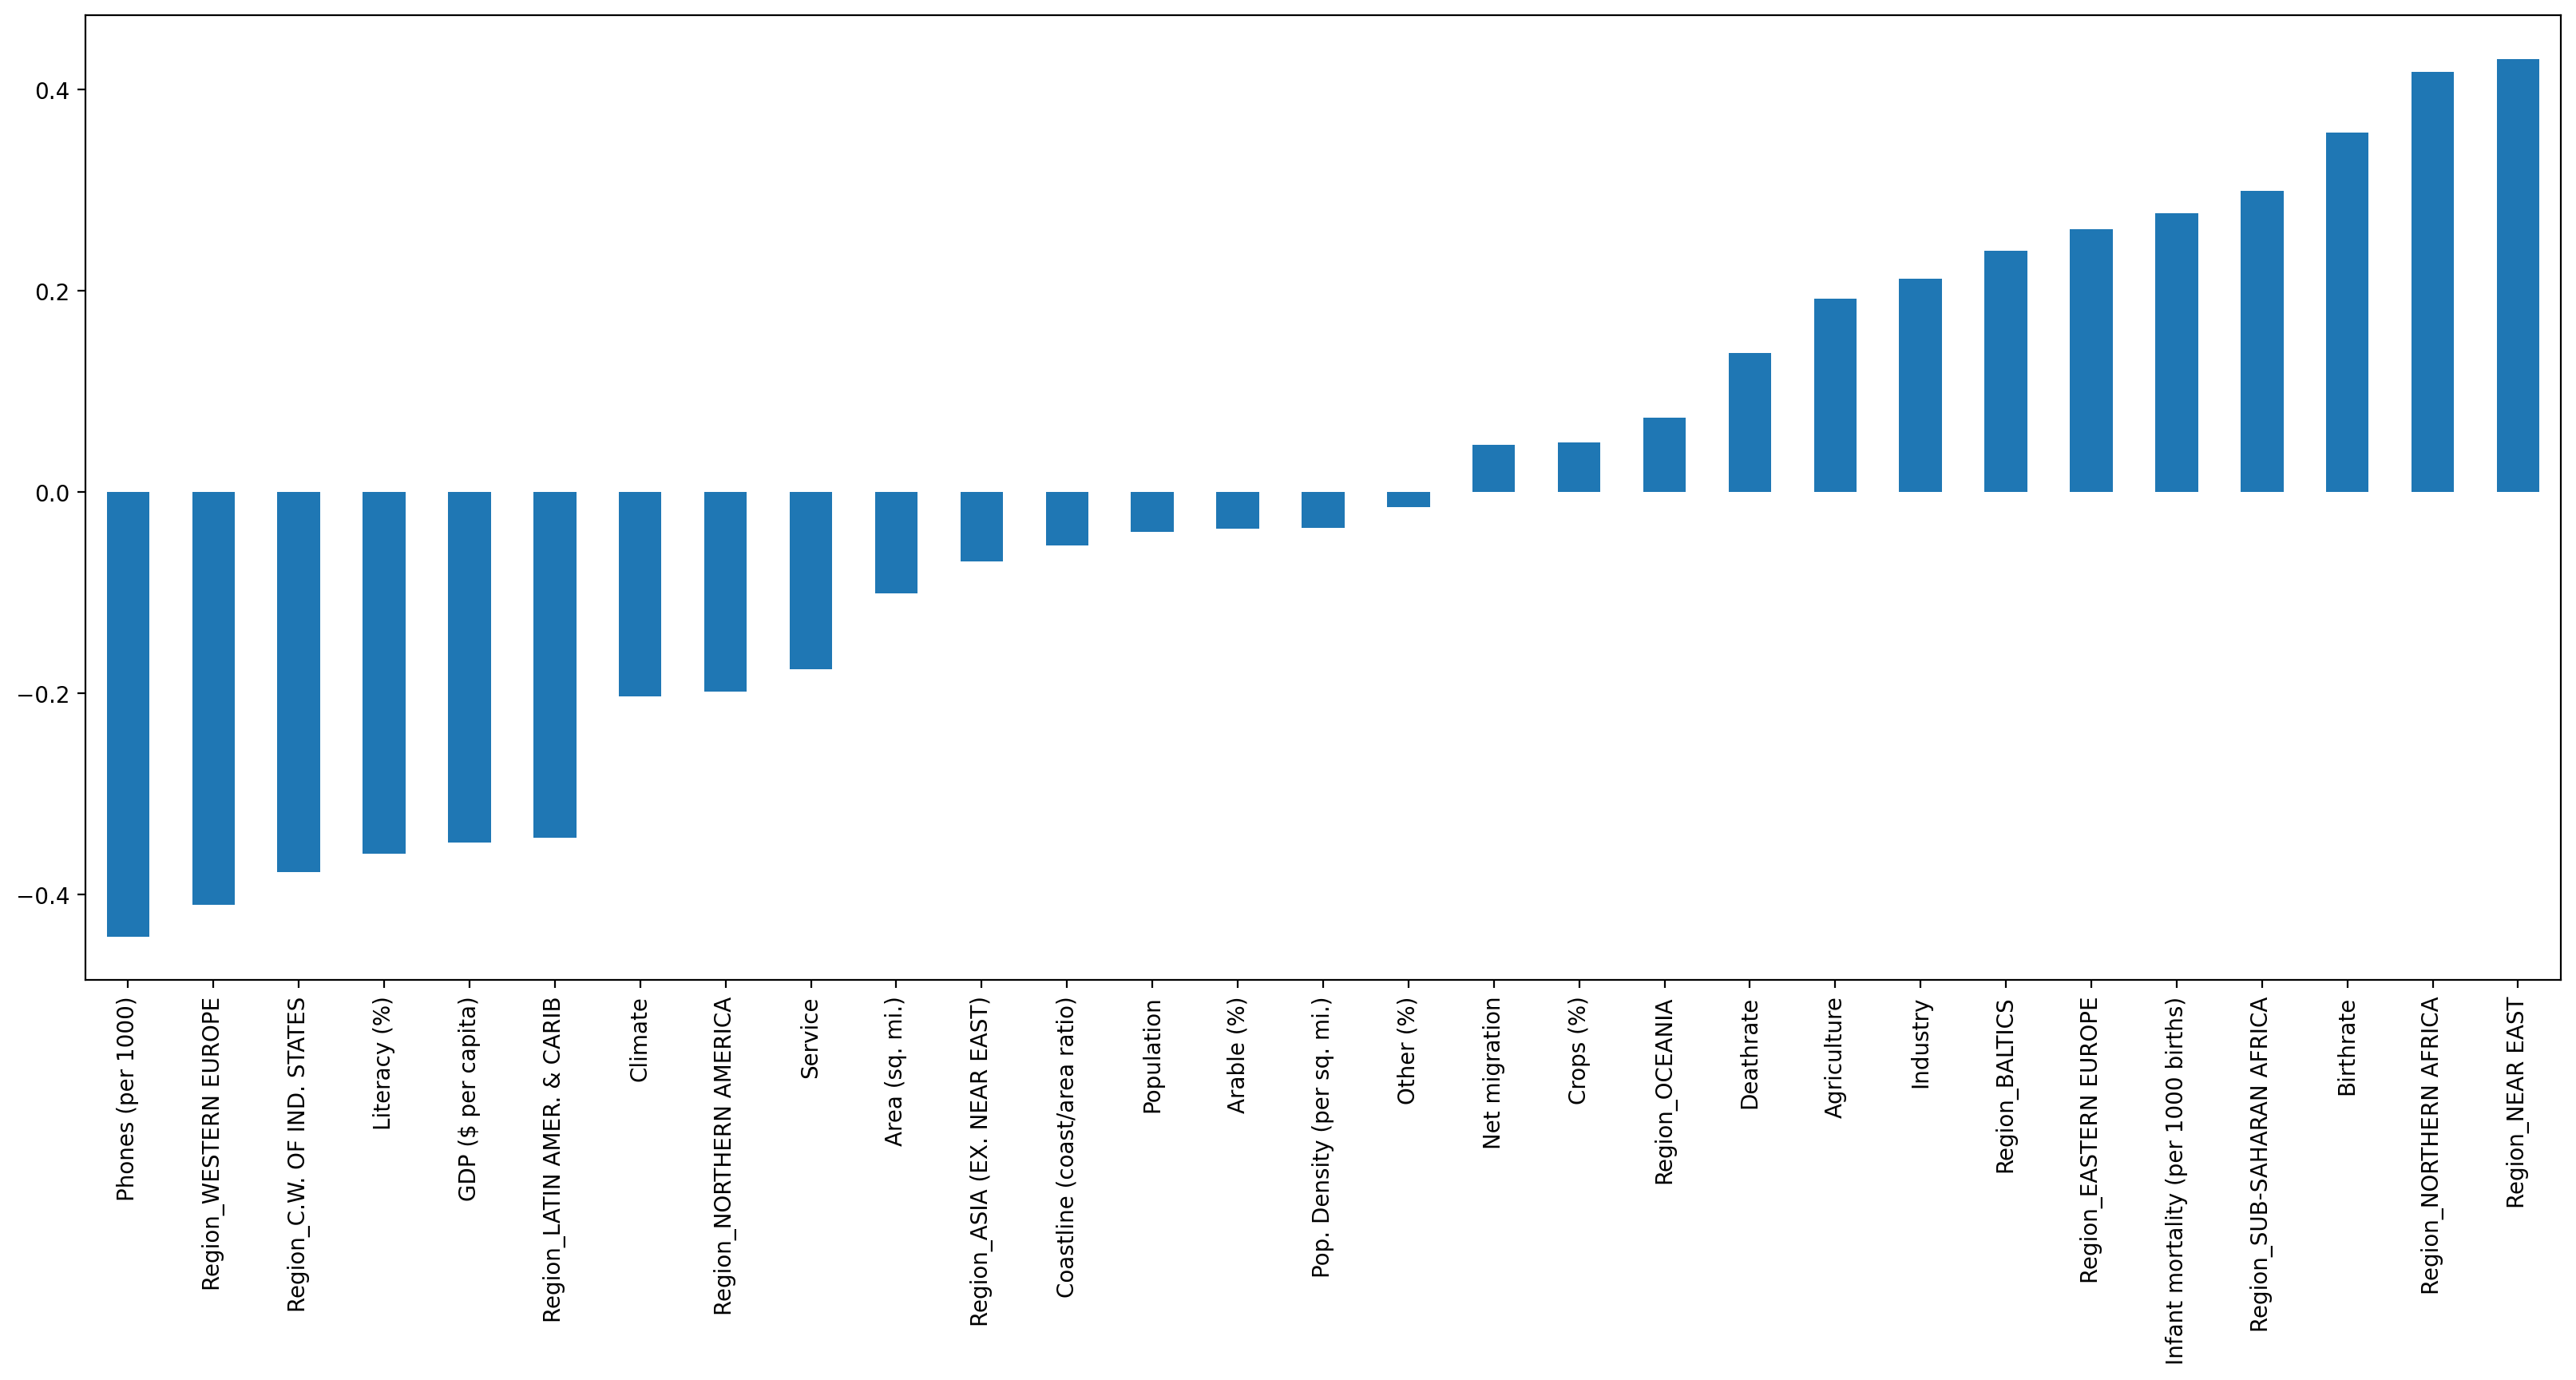

In [45]:
plt.figure(figsize=(20,8),dpi=200)
X.corr()['Clusters'].iloc[:-1].sort_values().plot(kind='bar')
plt.xticks(rotation=90);

In [46]:
X.corr()['Clusters'].iloc[:-1].sort_values()

Phones (per 1000)                    -0.441288
Region_WESTERN EUROPE                -0.409743
Region_C.W. OF IND. STATES           -0.377316
Literacy (%)                         -0.359393
GDP ($ per capita)                   -0.348136
Region_LATIN AMER. & CARIB           -0.343663
Climate                              -0.202915
Region_NORTHERN AMERICA              -0.198267
Service                              -0.175817
Area (sq. mi.)                       -0.100859
Region_ASIA (EX. NEAR EAST)          -0.068469
Coastline (coast/area ratio)         -0.053220
Population                           -0.039230
Arable (%)                           -0.036272
Pop. Density (per sq. mi.)           -0.035436
Other (%)                            -0.014832
Net migration                         0.047232
Crops (%)                             0.049227
Region_OCEANIA                        0.074281
Deathrate                             0.137976
Agriculture                           0.191783
Industry     

* **Lower cluster tends to have high Phones, Literacy, GDP, and located in Western Europe or C.W of Ind. States.**
* **Higher Cluster tends to have high Birthrate and located in Near East or Northern Africe**

In [47]:
df['Cluster'] = kmeans.labels_

In [48]:
df[df['Cluster'] == 0].head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
9,Armenia,C.W. OF IND. STATES,2976372,29800,99.9,0.00,-6.47,23.28,3500.0,98.6,195.7,17.55,2.30,80.15,4.0,12.07,8.23,0.239,0.343,0.418,0
13,Azerbaijan,C.W. OF IND. STATES,7961619,86600,91.9,0.00,-4.90,81.74,3400.0,97.0,137.1,19.63,2.71,77.66,1.0,20.74,9.75,0.141,0.457,0.402,0
18,Belarus,C.W. OF IND. STATES,10293011,207600,49.6,0.00,2.54,13.37,6100.0,99.6,319.1,29.55,0.60,69.85,4.0,11.16,14.02,0.093,0.316,0.591,0
75,Georgia,C.W. OF IND. STATES,4661473,69700,66.9,0.44,-4.70,18.59,2500.0,99.0,146.6,11.44,3.86,84.70,3.0,10.41,9.23,0.172,0.275,0.553,0
80,Greenland,NORTHERN AMERICA,56361,2166086,0.0,2.04,-8.37,15.82,20000.0,0.0,448.9,0.00,0.00,100.00,1.0,15.93,7.84,0.000,0.000,0.000,0


In [49]:
df[df['Cluster'] == 9].head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,9
60,Egypt,NORTHERN AFRICA,78887007,1001450,78.8,0.24,-0.22,32.59,4000.0,57.7,131.8,2.87,0.48,96.65,1.0,22.94,5.23,0.149,0.357,0.493,9
118,Libya,NORTHERN AFRICA,5900754,1759540,3.4,0.10,0.00,24.60,6400.0,82.6,127.1,1.03,0.19,98.78,1.5,26.49,3.48,0.076,0.499,0.425,9
141,Morocco,NORTHERN AFRICA,33241259,446550,74.4,0.41,-0.98,41.62,4000.0,51.7,40.4,19.61,2.17,78.22,1.5,21.98,5.58,0.217,0.357,0.426,9
205,Tunisia,NORTHERN AFRICA,10175014,163610,62.2,0.70,-0.57,24.77,6900.0,74.2,123.6,17.86,13.74,68.40,3.0,15.52,5.13,0.132,0.318,0.550,9


---
---

# **4 - Geographical Model Interpretation**

The best way to interpret this model is through visualizing the clusters of countries on a map!

**TASK: Create cluster labels for a chosen K value. Based on the solutions, we believe either K=3 or K=15 are reasonable choices. But feel free to choose differently and explore.**

**Plot out these clusters on a country level choropleth map. You'll need to do the following:**

1. Figure out how to install plotly library: https://plotly.com/python/getting-started/

2. Figure out how to create a geographical choropleth map using plotly: https://plotly.com/python/choropleth-maps/#using-builtin-country-and-state-geometries

3. You will need ISO Codes for this. Either use the wikipedia page, or use our provided file for this.

4. Combine the cluster labels, ISO Codes, and Country Names to create a world map plot with plotly given what you learned in Step 1 and Step 2.





In [50]:
df_iso = pd.read_csv('/content/drive/MyDrive/Data_Science/Projects/Machine_Learning/Clustering/Country_and_Region_Similarities/country_iso_codes.csv')

In [51]:
df_iso.head()

,Country,ISO Code
0,Afghanistan,AFG
1,"Akrotiri and Dhekelia – See United Kingdom, The","Akrotiri and Dhekelia – See United Kingdom, The"
2,Åland Islands,ALA
3,Albania,ALB
4,Algeria,DZA


In [52]:
df_iso.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Country   301 non-null    object
 1   ISO Code  301 non-null    object
dtypes: object(2)
memory usage: 4.8+ KB


In [53]:
# Convert iso code of each country to dictionary
iso_mapping = df_iso.set_index('Country')['ISO Code'].to_dict()

In [54]:
# Add ISO Code to df based on country
df['ISO Code'] = df['Country'].map(iso_mapping)

In [55]:
df.head()

,Country,Region,Population,Area (sq. mi.),Pop. Density (per sq. mi.),Coastline (coast/area ratio),Net migration,Infant mortality (per 1000 births),GDP ($ per capita),Literacy (%),Phones (per 1000),Arable (%),Crops (%),Other (%),Climate,Birthrate,Deathrate,Agriculture,Industry,Service,Cluster,ISO Code
0,Afghanistan,ASIA (EX. NEAR EAST),31056997,647500,48.0,0.00,23.06,163.07,700.0,36.0,3.2,12.13,0.22,87.65,1.0,46.60,20.34,0.380,0.240,0.380,5,AFG
1,Albania,EASTERN EUROPE,3581655,28748,124.6,1.26,-4.93,21.52,4500.0,86.5,71.2,21.09,4.42,74.49,3.0,15.11,5.22,0.232,0.188,0.579,6,ALB
2,Algeria,NORTHERN AFRICA,32930091,2381740,13.8,0.04,-0.39,31.00,6000.0,70.0,78.1,3.22,0.25,96.53,1.0,17.14,4.61,0.101,0.600,0.298,9,DZA
3,American Samoa,OCEANIA,57794,199,290.4,58.29,-20.71,9.27,8000.0,97.0,259.5,10.00,15.00,75.00,2.0,22.46,3.27,0.000,0.000,0.000,4,ASM
4,Andorra,WESTERN EUROPE,71201,468,152.1,0.00,6.60,4.05,19000.0,100.0,497.2,2.22,0.00,97.78,3.0,8.71,6.25,0.000,0.000,0.000,1,AND


In [56]:
#!pip install plotly

In [57]:
import plotly.express as px

fig = px.choropleth(df, locations="ISO Code",
                    color="Cluster", # column of gapminder
                    hover_name="Country" # column to add to hover information
                    )
fig.show()

---
---